<a href="https://colab.research.google.com/github/rubymanderna/ML_ECGR5105/blob/main/Ruby801311756Homework1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home work 1

### problem 1


Develop a code that run linear regression with a gradient descent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).



In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
def read_dataset(file_path):
    return pd.read_csv(file_path)

In [ ]:
 # Preprocess the data
def preprocess_data_1(df):
    X = df[['X1', 'X2', 'X3']].values
    y = df['Y'].values
    m = len(y)
    X_reshaped = []  # List to store reshaped X for each feature
    theta = []  # List to store theta for each feature

    for i in range(3):
        X_i = np.hstack((np.ones((m, 1)), X[:, i:i+1]))  # Add a column of ones for X0
        X_reshaped.append(X_i)
        theta_i = np.zeros(2)  # Initialize theta to zeros for each feature
        theta.append(theta_i)

    return X_reshaped, y, theta, m


In [ ]:
# Compute the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = 1 / (2 * m) * np.sum(errors**2)
    return J

In [ ]:
# Gradient descent algorithm
def gradient_descent_1(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * X.transpose().dot(errors)
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [ ]:
# Plot regression and cost history
def plot_regression_1(X, y, theta, cost_history, feature_name, alpha):
    # Plot the regression line
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.scatter(X[:, 1], y, color='blue', marker='+', label=f'Training Data ({feature_name})')
    plt.plot(X[:, 1], X.dot(theta), color='green', label=f'Linear Regression ({feature_name})')
    plt.xlabel(f'Feature Value ({feature_name})')
    plt.ylabel('Target Value')
    plt.title(f'Linear Regression Fit ({feature_name}) - Alpha={alpha}')
    plt.legend()
    plt.show()

    # Plot the cost history
    plt.figure(figsize=(10, 6))
    plt.grid(True)

    #plt.plot(range(1, iterations + 1), cost_history, label=f'Cost Function ({feature_name})')
    plt.plot(range(1, iterations + 1), cost_history, label=f'Cost Function (Alpha={alpha})')

    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Convergence of gradient descent ({feature_name}) - Alpha={alpha}')
    plt.legend()
    plt.show()


In [ ]:
# Step 1: Read the Dataset
df = read_dataset("/content/drive/MyDrive/ML_ECGR5105/D3.csv")

# Step 2: Preprocess the Data
X, y, theta, m = preprocess_data_1(df)
# Step 3: Define Hyperparameters
alphas = [0.01, 0.05 , 0.1]
iterations = 1500

Theta =  [ 5.71850653 -1.9568206 ]


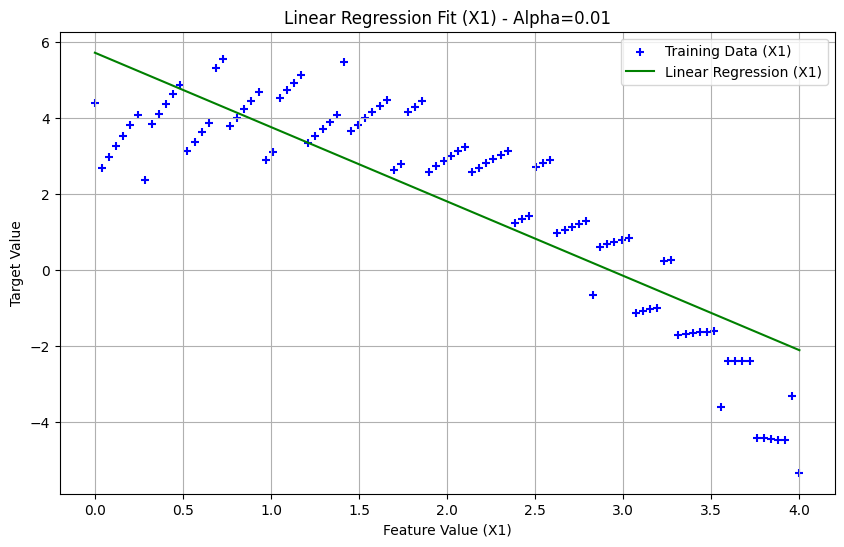

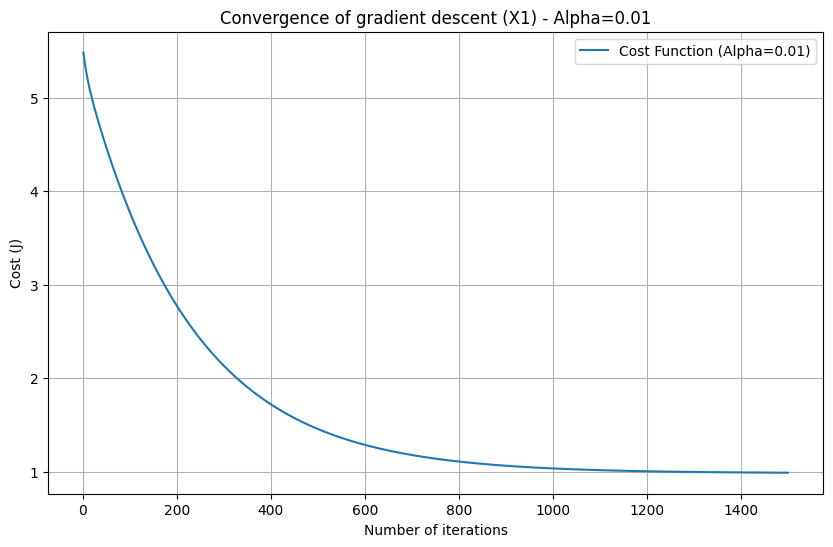

Theta =  [0.71988473 0.56390334]


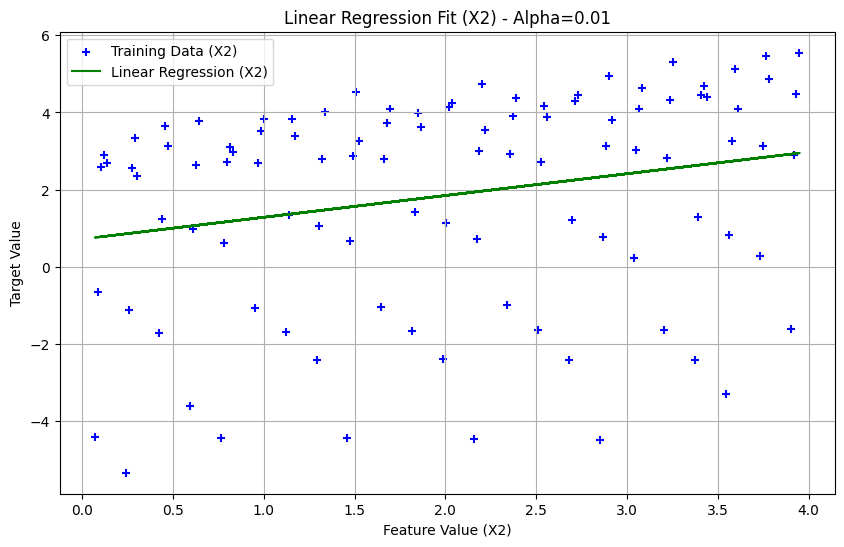

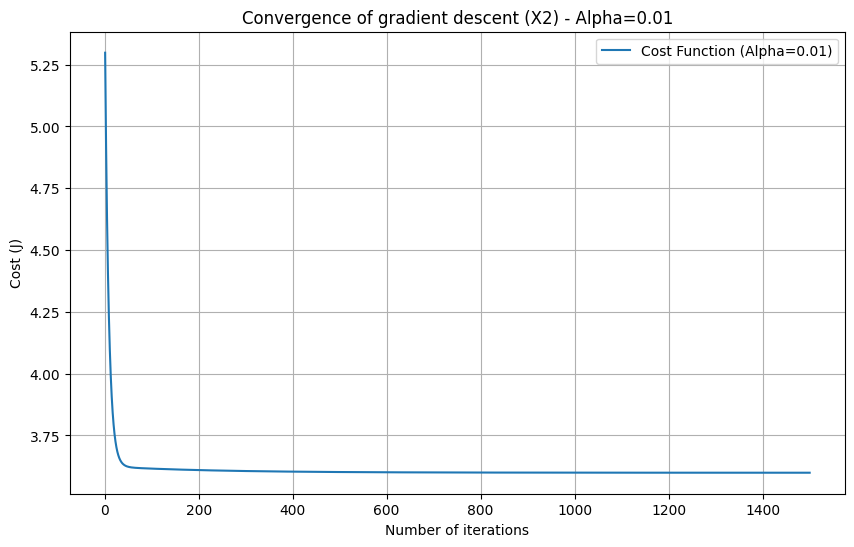

Theta =  [ 2.78048129 -0.48451631]


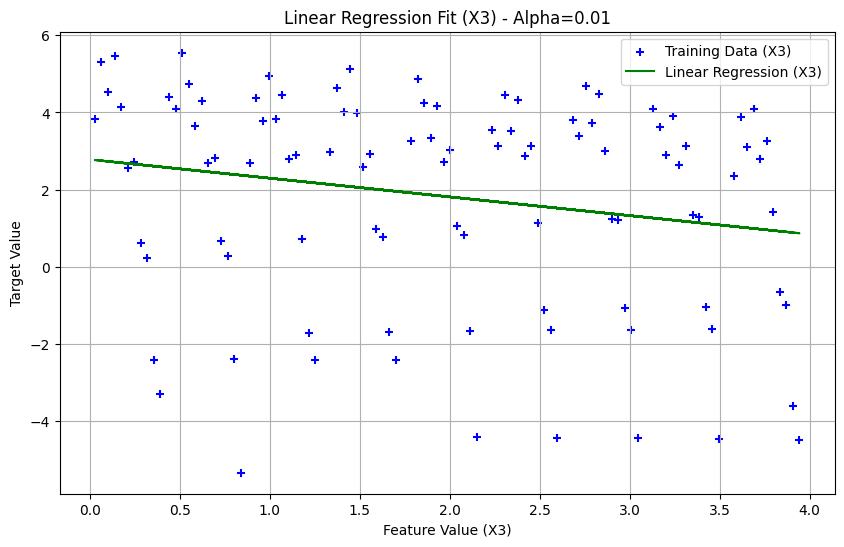

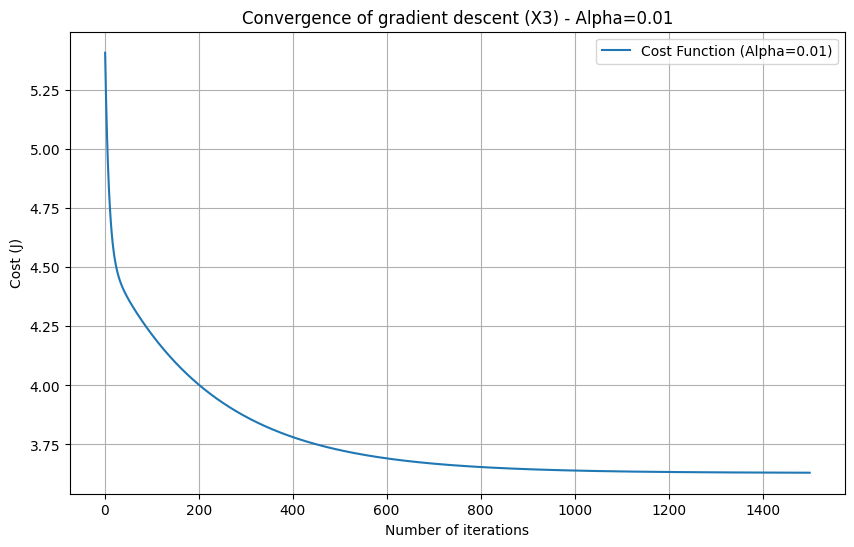

Theta =  [ 5.92794891 -2.03833663]


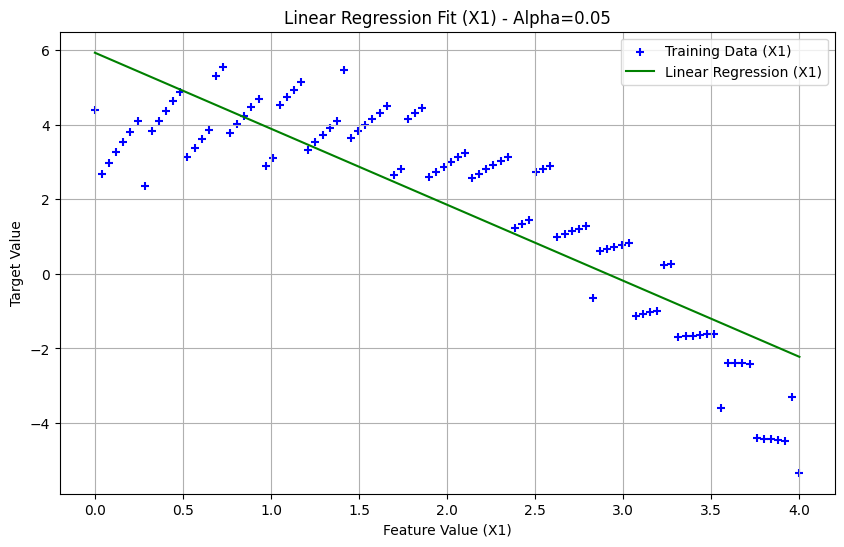

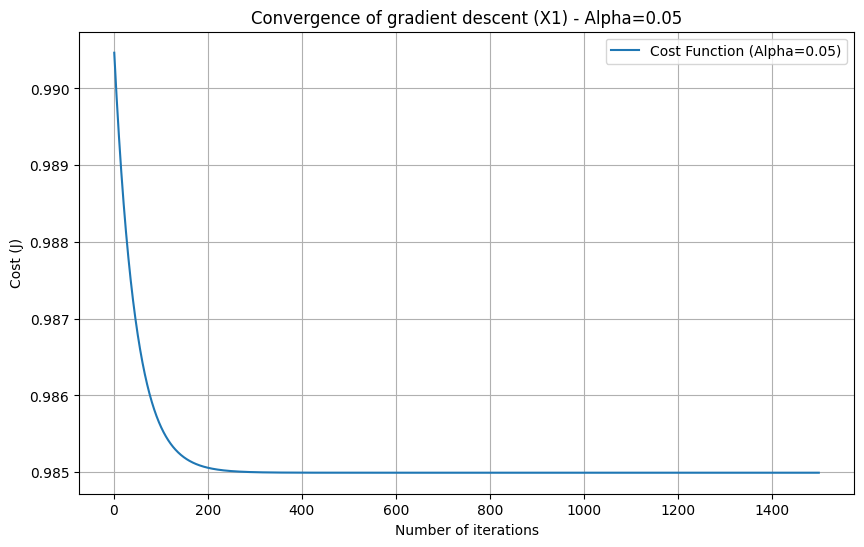

Theta =  [0.73606043 0.55760761]


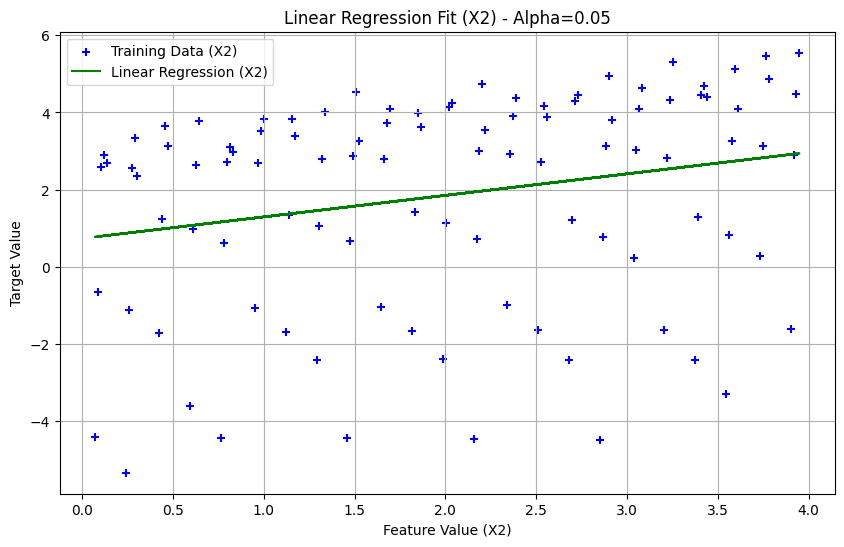

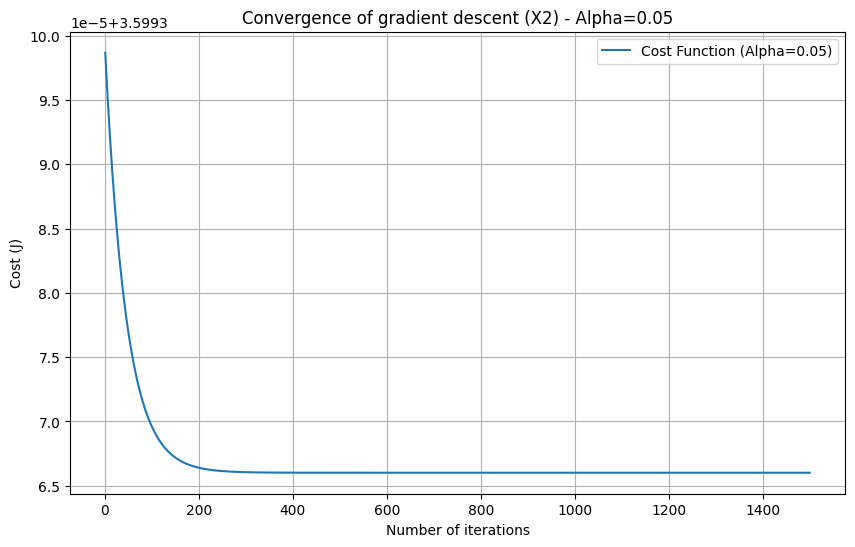

Theta =  [ 2.8714221  -0.52048288]


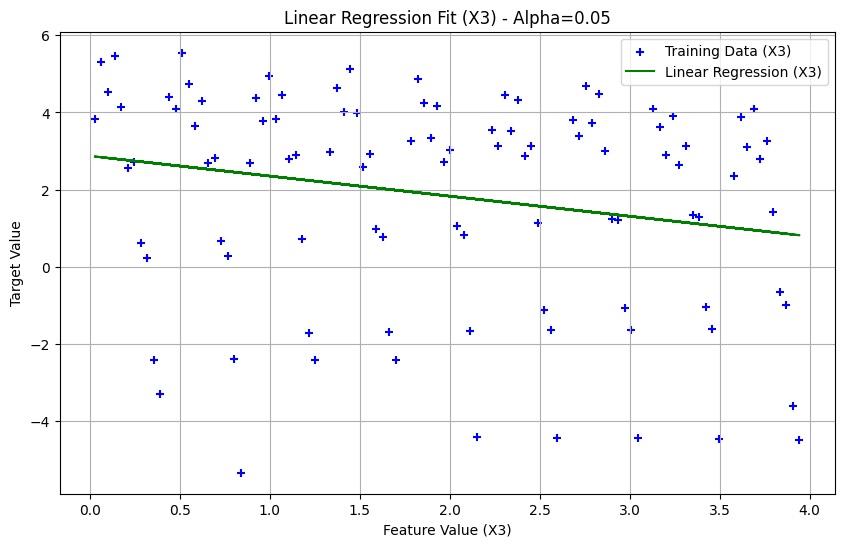

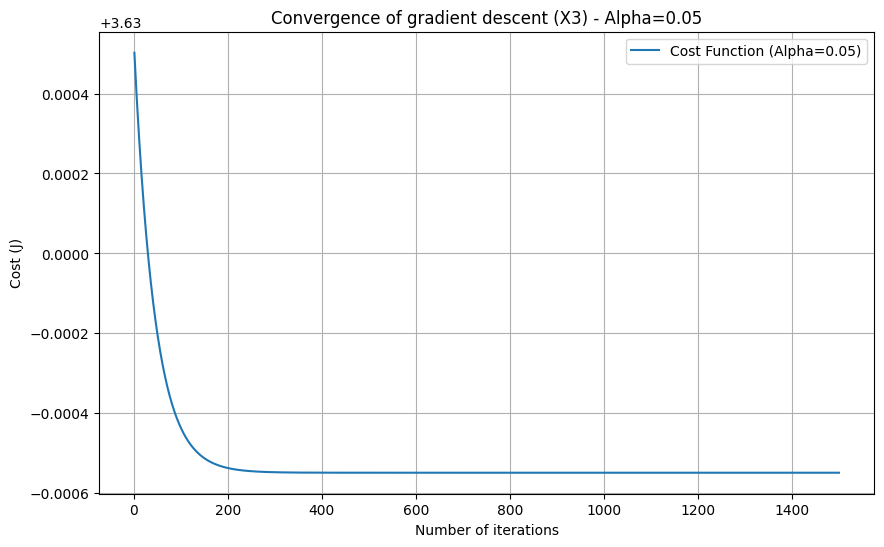

Theta =  [ 5.92794892 -2.03833663]


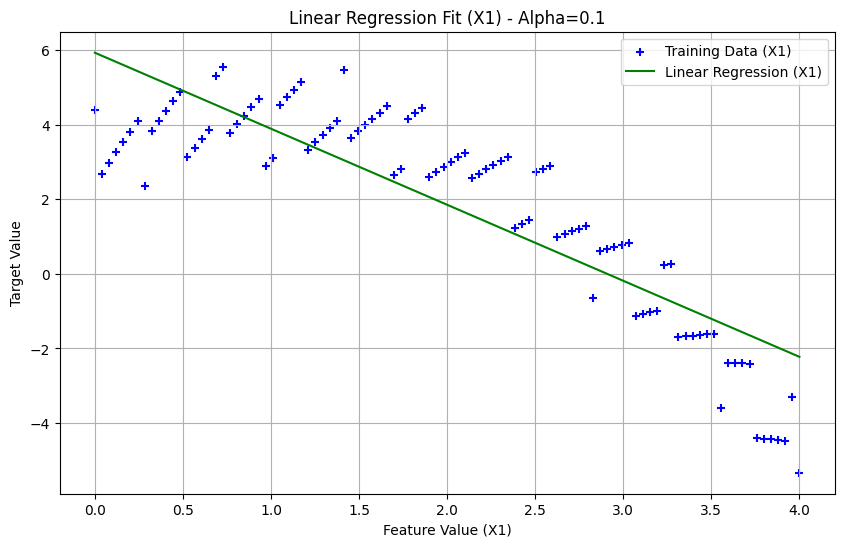

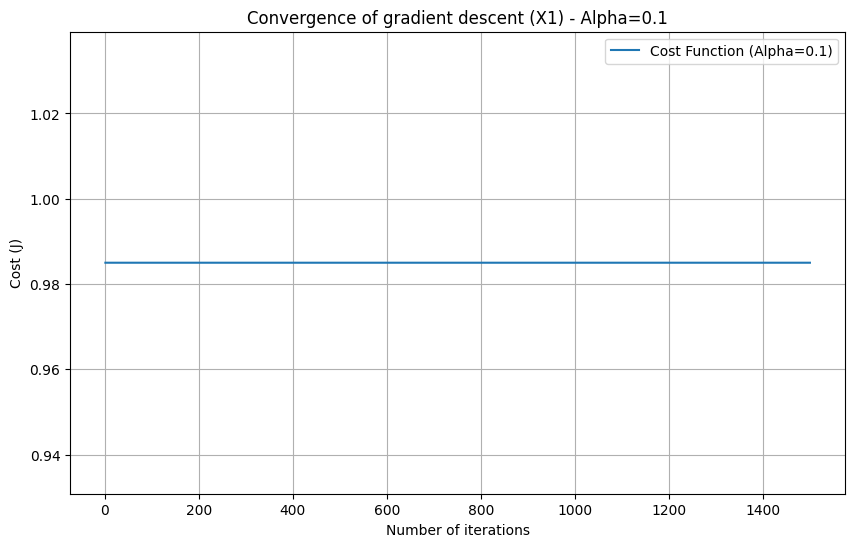

Theta =  [0.73606043 0.55760761]


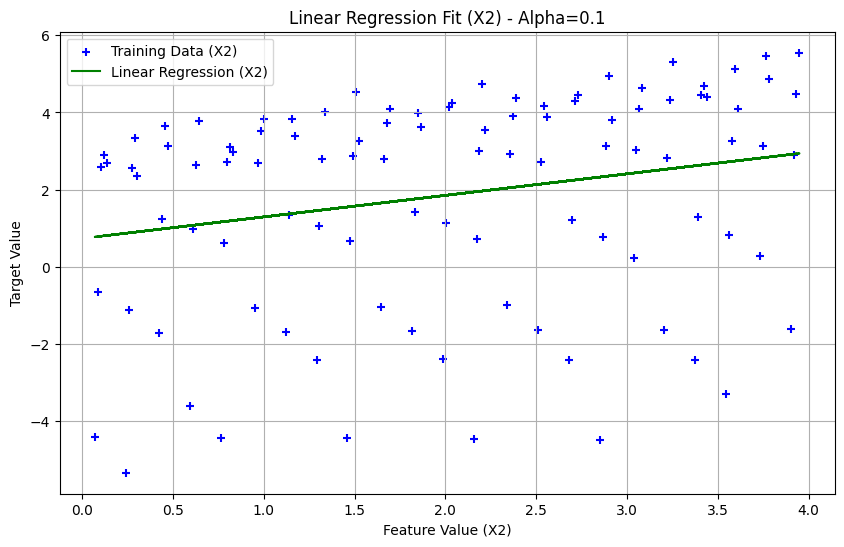

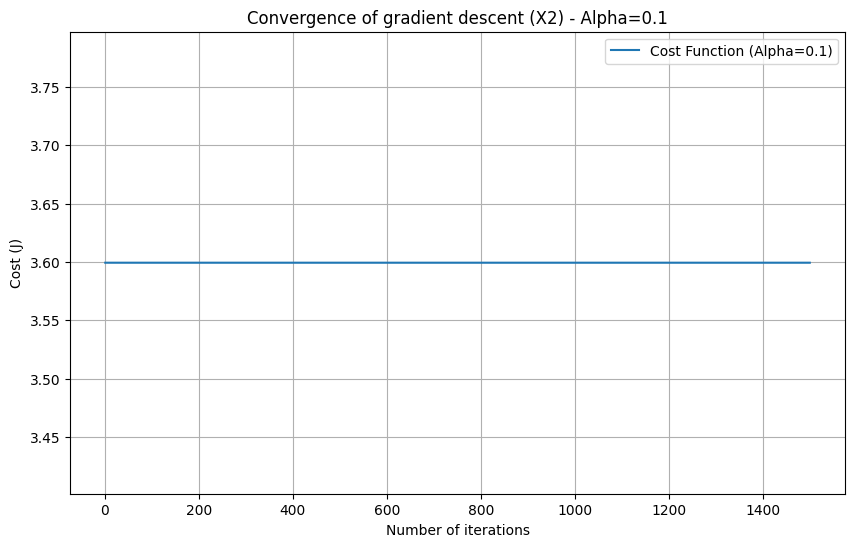

Theta =  [ 2.8714221  -0.52048288]


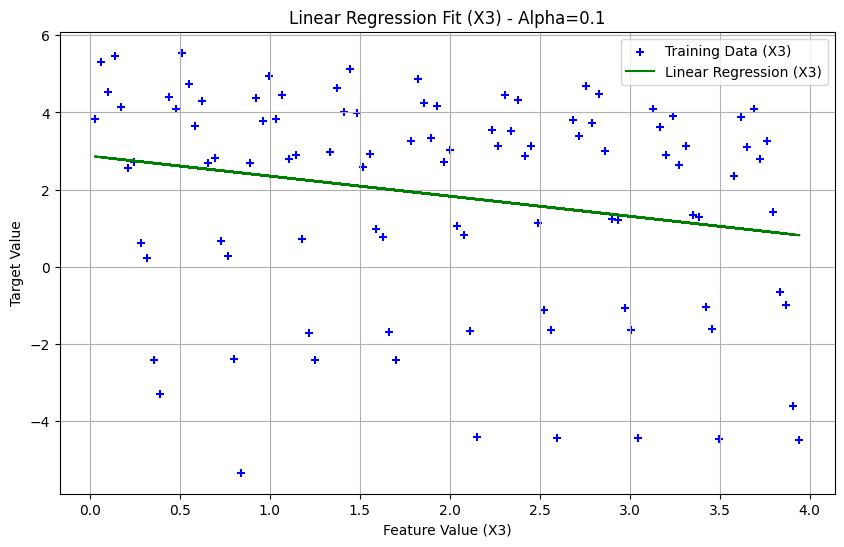

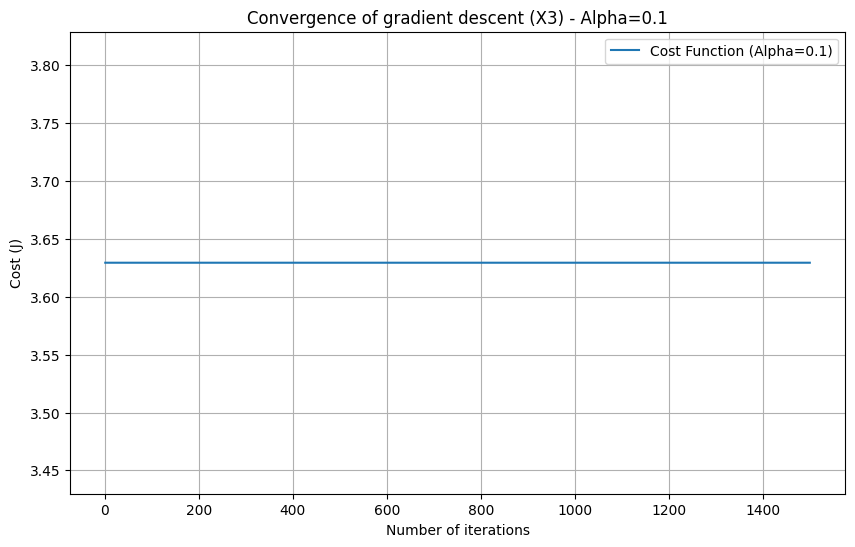

In [ ]:
# Step 4: Run Gradient Descent for Each Explanatory Variable and Each Alpha
for alpha in alphas:
    for i, feature_name in enumerate(['X1', 'X2', 'X3']):
        theta_i, cost_history_i = gradient_descent_1(X[i], y, theta[i], alpha, iterations)
        print('Theta = ' , theta_i)
        plot_regression_1(X[i], y, theta_i, cost_history_i, feature_name, alpha)




# Problem 2

This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

Report the final linear model you found the best.
Plot loss over the iteration.
Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.
Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

In [ ]:
def read_dataset(file_path):
    return pd.read_csv(file_path)


In [ ]:

def preprocess_data_2(df):
    X = df[['X1', 'X2', 'X3']].values
    y = df['Y'].values
    m = len(y)
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))  # Add a column of ones for X0
    print(X[:5])
    theta = np.zeros(4)  # Initialize theta to zeros for all features (including X0)
    return X, y, theta, m

In [ ]:
def gradient_descent_2(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        for j in range(len(theta)):
            theta[j] -= (alpha / m) * (errors.dot(X[:, j]))
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [ ]:
def plot_regression_2(X, y, theta, cost_history):
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.grid(True)
    plt.scatter(X[:, 1], y, color='blue', marker='+', label='Training Data')
    plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')
    plt.xlabel('Feature Value')
    plt.ylabel('Target Value')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.show()

    plt.grid(True)
    plt.plot(range(1, iterations + 1), cost_history, label=f'Cost Function (Alpha={alpha})')

    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Convergence of gradient descent (Alpha={alpha})')
    plt.legend()
    plt.show()


In [ ]:
# Step 1: Read the Dataset
df = read_dataset("/content/drive/MyDrive/ML_ECGR5105/D3.csv")

# Step 2: Preprocess the Data
X, y, theta, m = preprocess_data_2(df)


[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]]


In [ ]:
# Step 3: Define Hyperparameters
alpha_values = [0.01, 0.05, 0.1]  # List of different alpha values
iterations = 1500

# Store results for each alpha
results = []


In [ ]:
# Step 4: Run Gradient Descent for Different Alphas
for alpha in alpha_values:
    theta, cost_history = gradient_descent_2(X, y, theta.copy(), alpha, iterations)  # Make a copy of theta
    results.append((alpha, theta, cost_history))

Alpha: 0.01
theta: [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history: [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


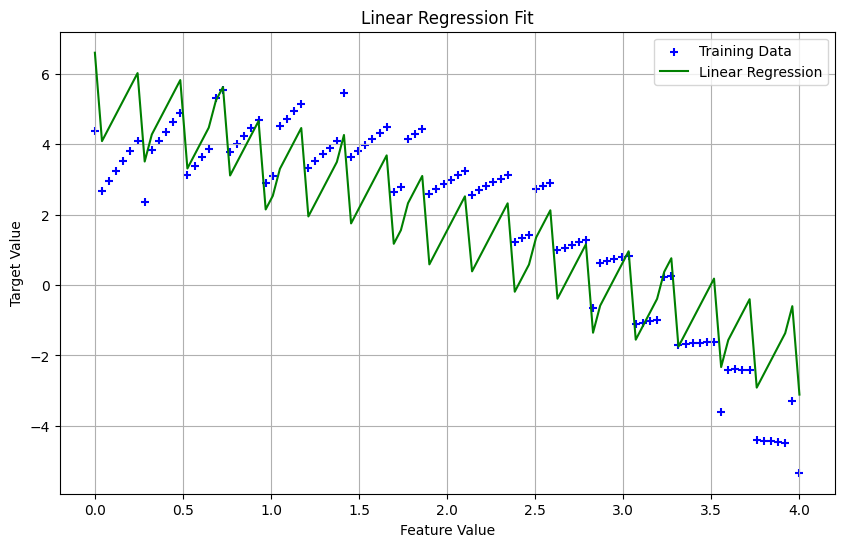

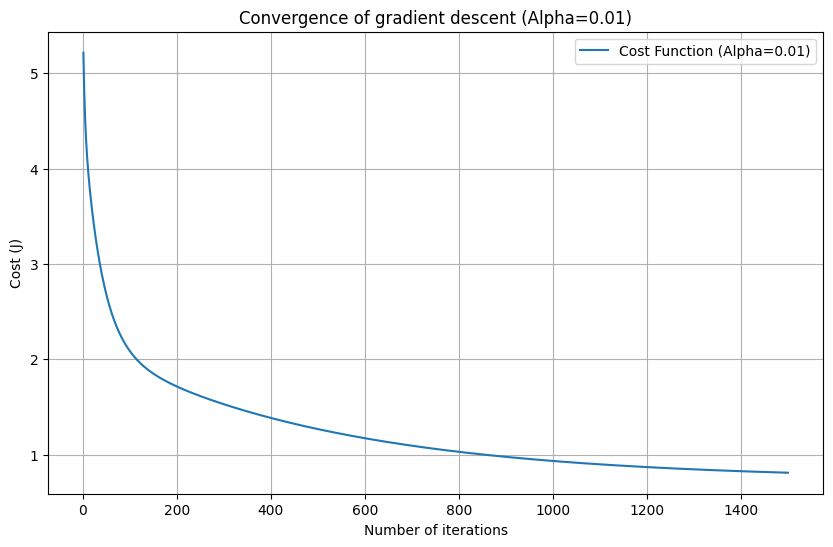

Alpha: 0.05
theta: [ 5.31352068 -2.00362794  0.53267017 -0.2655071 ]
cost_history: [0.80979405 0.80908479 0.80838257 ... 0.73846426 0.73846426 0.73846426]


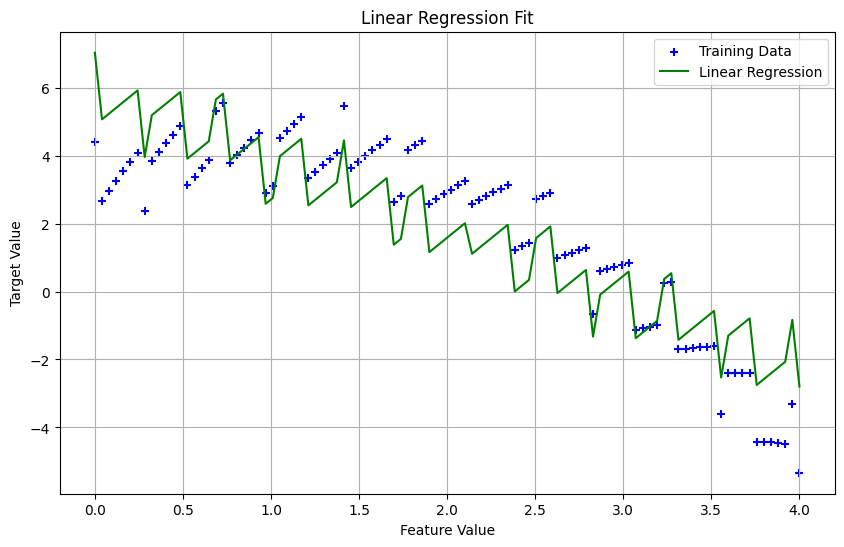

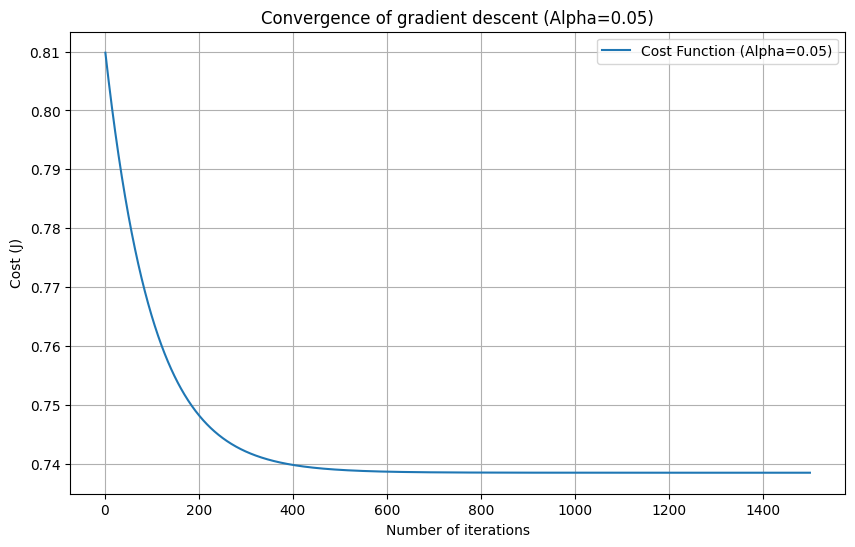

Alpha: 0.1
theta: [ 5.31416717 -2.00371927  0.53256334 -0.26560187]
cost_history: [0.73846426 0.73846426 0.73846426 ... 0.73846424 0.73846424 0.73846424]


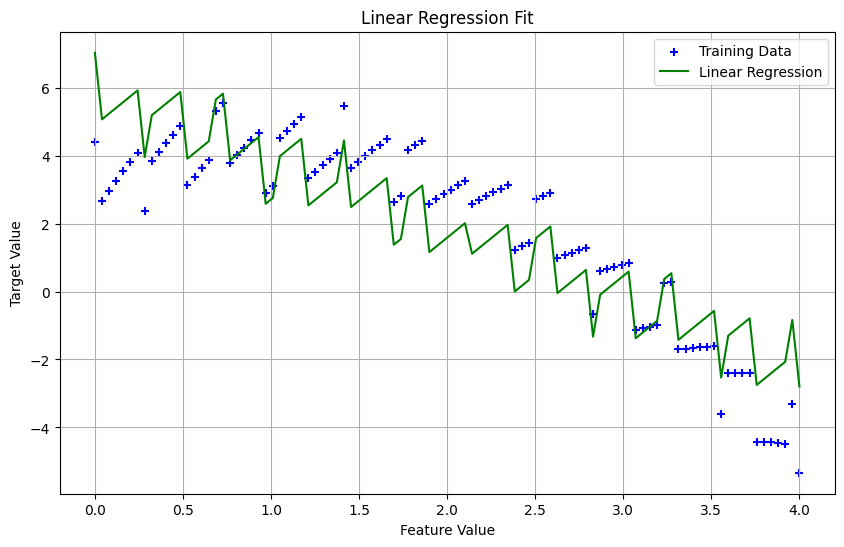

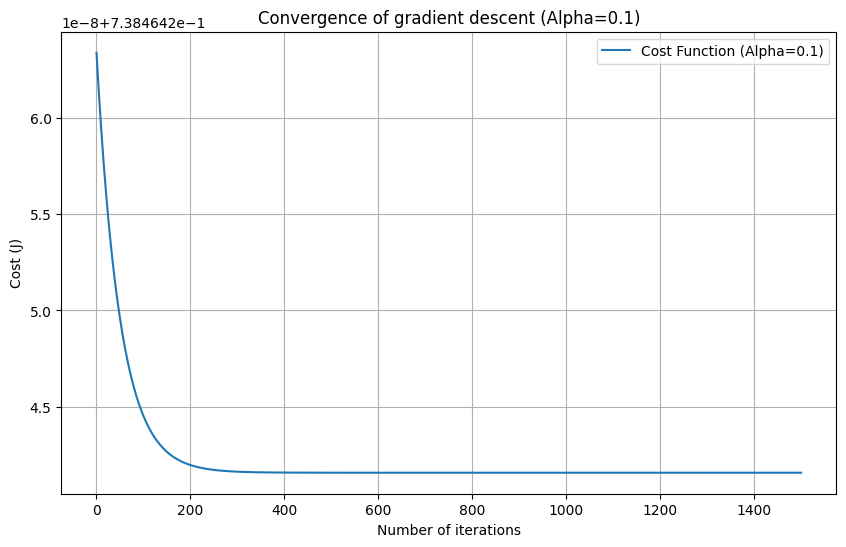

In [ ]:
# Step 5: Plot the Regression Model and Loss for Each Alpha

for alpha, theta, cost_history in results:
    print(f"Alpha: {alpha}")
    print(f"theta: {theta}")
    print(f"cost_history: {cost_history}")
    plot_regression_2(X, y, theta, cost_history)


In [ ]:
best_alpha = 0.05

In [ ]:
# Define the new data points
new_data_points = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])

In [ ]:
# Preprocess the new data points in the same way as the training data
new_data = np.hstack((np.ones((new_data_points.shape[0], 1)), new_data_points))


In [ ]:
# Predict the values of y for the new data points using the trained model
predictions = new_data.dot(results[1][1])  # Use results[1] since alpha = 0.05 is at index 1

In [ ]:
# Display the predicted values
for i, (x1, x2, x3) in enumerate(new_data_points):
    print(f"Predicted Y for (X1={x1}, X2={x2}, X3={x3}): {predictions[i]}")



Predicted Y for (X1=1, X2=1, X3=1): 3.5770557986000515
Predicted Y for (X1=2, X2=0, X3=4): 0.24423638590888608
Predicted Y for (X1=3, X2=2, X3=1): 0.10247008365842536
